In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/vqa-dataset/VQA_Dataset.csv')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


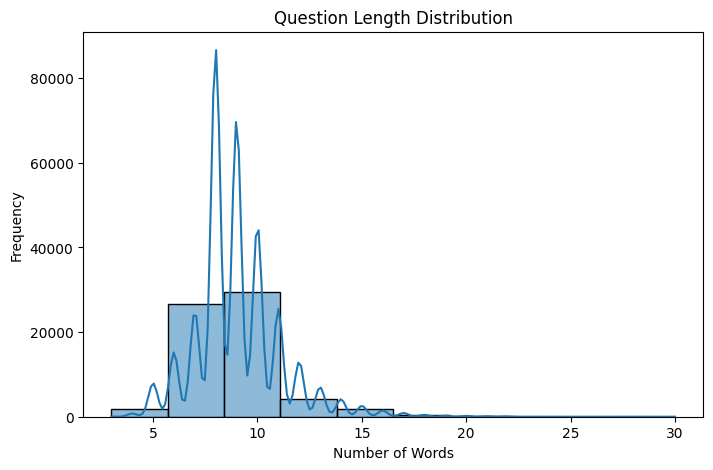

In [3]:
# --- Graph 1: Question Length Distribution ---
df['question_len'] = df['question'].apply(lambda x: len(word_tokenize(str(x))))
plt.figure(figsize=(8,5))
sns.histplot(df['question_len'], bins=10, kde=True)
plt.title("Question Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


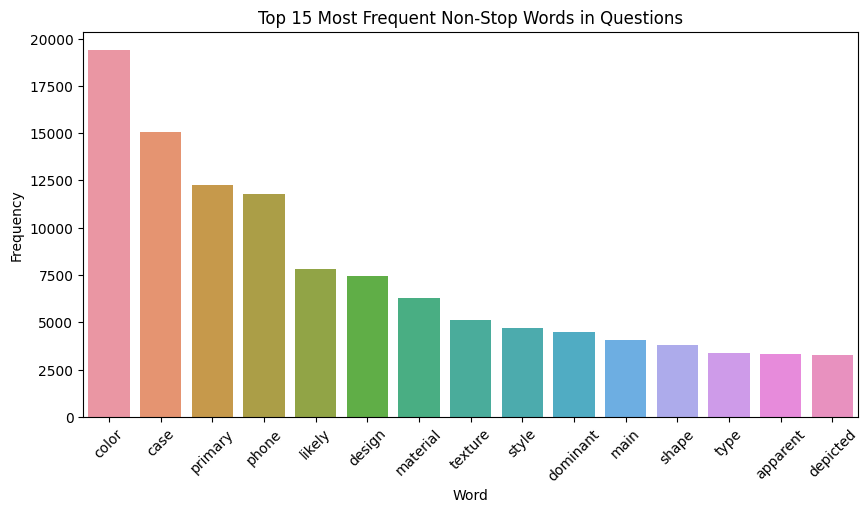

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
all_words = [word.lower() for q in df['question'] for word in word_tokenize(str(q)) if word.isalpha() and word.lower() not in stop_words]

# Count most frequent words
word_freq = Counter(all_words)
most_common = word_freq.most_common(15)

# Plot
words, counts = zip(*most_common)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts))
plt.title("Top 15 Most Frequent Non-Stop Words in Questions")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

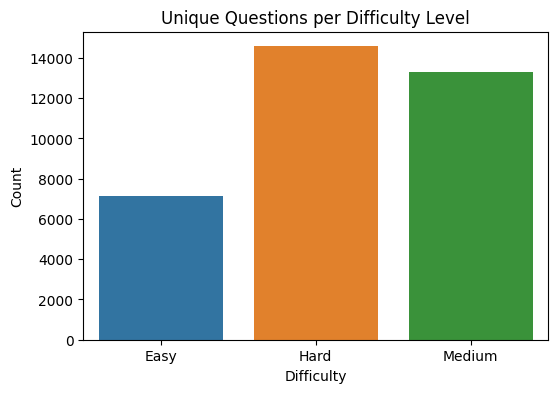

In [6]:
# --- Graph 3: Unique Question Count by Difficulty ---
unique_qs = df.groupby('difficulty')['question'].nunique().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=unique_qs, x='difficulty', y='question')
plt.title("Unique Questions per Difficulty Level")
plt.ylabel("Count")
plt.xlabel("Difficulty")
plt.show()

In [7]:
# --- Graph 4: Vocabulary Size ---
vocab = set(all_words)
print("Vocabulary size (unique words):", len(vocab))

Vocabulary size (unique words): 5075


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


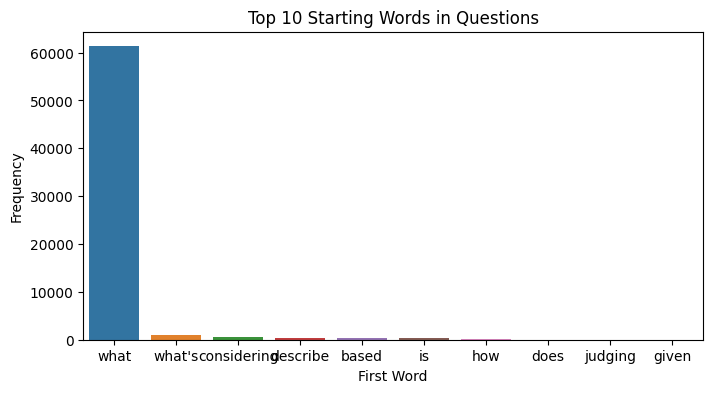

In [8]:
# --- Graph 5: Question Start Word Distribution ---
start_words = df['question'].apply(lambda q: str(q).strip().split()[0].lower() if isinstance(q, str) else "")
start_counts = Counter(start_words)
top_starts = start_counts.most_common(10)

start_terms, freqs = zip(*top_starts)
plt.figure(figsize=(8,4))
sns.barplot(x=list(start_terms), y=list(freqs))
plt.title("Top 10 Starting Words in Questions")
plt.xlabel("First Word")
plt.ylabel("Frequency")
plt.show()